In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
# generate a list of column names
new_columns = list(range(-80, 19))

In [3]:
data= pd.read_csv(r"D:\ten organism\train data\santalucia bac vs. shuffled ten.csv")
downstream= pd.read_csv(r"D:\downstream control\train organism\train_downstream_santalucia.csv")

In [4]:
data.isnull().values.any()

False

In [5]:
data.head(5)

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-1.28,-1.44,-1.44,-1.44,-1.44,-1.00,-1.00,-1.28,-1.84,-1.28,...,-1.28,-1.84,-2.24,-1.44,-1.00,-0.58,-1.30,-1.84,-1.30,1
1,-1.28,-1.28,-1.84,-1.45,-1.00,-1.00,-0.88,-1.28,-1.45,-1.00,...,-1.30,-1.30,-1.00,-1.45,-1.45,-1.45,-1.45,-1.00,-0.88,1
2,-0.58,-0.88,-1.00,-1.44,-1.44,-1.44,-1.30,-1.00,-1.00,-1.30,...,-2.24,-1.84,-1.30,-0.88,-1.44,-1.44,-1.00,-1.00,-1.44,1
3,-1.30,-2.27,-2.24,-1.84,-1.30,-1.00,-0.88,-1.00,-1.00,-0.58,...,-1.28,-1.45,-0.88,-1.44,-1.84,-1.30,-1.30,-2.27,-1.84,1
4,-0.58,-1.00,-0.88,-1.00,-1.28,-1.28,-1.00,-0.58,-1.45,-1.45,...,-2.24,-1.30,-1.00,-1.30,-1.30,-1.00,-1.00,-1.00,-1.00,1


In [6]:
downstream.head(5)

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,-1.30,-1.44,-0.58,-0.88,-1.28,-1.45,-0.88,-1.00,-1.00,-0.58,...,-1.30,-2.27,-1.84,-2.24,-1.84,-1.84,-1.30,-1.00,-1.30,-1.44
1,-1.84,-1.30,-1.30,-1.30,-1.00,-1.30,-1.84,-1.30,-1.00,-1.45,...,-1.44,-2.27,-1.84,-2.24,-2.27,-1.45,-0.88,-0.58,-1.45,-2.24
2,-1.44,-1.84,-1.30,-1.00,-1.30,-1.30,-1.45,-1.45,-1.00,-1.45,...,-1.00,-1.00,-1.45,-1.45,-1.30,-2.27,-1.28,-1.00,-1.44,-1.30
3,-1.44,-1.44,-1.30,-1.00,-0.88,-1.00,-1.00,-1.44,-1.44,-1.00,...,-2.24,-2.27,-1.28,-1.44,-2.27,-1.28,-1.00,-1.00,-0.58,-1.00
4,-1.00,-1.00,-1.30,-1.30,-1.45,-2.24,-2.27,-1.28,-1.28,-1.28,...,-1.28,-1.28,-1.28,-1.44,-1.30,-0.88,-1.44,-1.30,-0.88,-0.58


### Preprocessing Promoter data

In [7]:
promoter_seq = data[data['label'] == 1]
promoter_seq.shape

(14669, 100)

In [8]:
promoter_no_label=promoter_seq.drop(columns=['label'])
promoter_no_label.columns=new_columns
promoter_no_label.shape

(14669, 99)

In [9]:
promoter_without_label=promoter_no_label
promoter_without_label.shape

(14669, 99)

In [10]:
promoter_without_label['label']=1

In [11]:
promoter= promoter_without_label
promoter['label']=promoter['label'].astype(int)
promoter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14669 entries, 0 to 14668
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   -80     14669 non-null  float64
 1   -79     14669 non-null  float64
 2   -78     14669 non-null  float64
 3   -77     14669 non-null  float64
 4   -76     14669 non-null  float64
 5   -75     14669 non-null  float64
 6   -74     14669 non-null  float64
 7   -73     14669 non-null  float64
 8   -72     14669 non-null  float64
 9   -71     14669 non-null  float64
 10  -70     14669 non-null  float64
 11  -69     14669 non-null  float64
 12  -68     14669 non-null  float64
 13  -67     14669 non-null  float64
 14  -66     14669 non-null  float64
 15  -65     14669 non-null  float64
 16  -64     14669 non-null  float64
 17  -63     14669 non-null  float64
 18  -62     14669 non-null  float64
 19  -61     14669 non-null  float64
 20  -60     14669 non-null  float64
 21  -59     14669 non-null  float64
 2

### Preprocessing Downstream Data

In [12]:
downstream

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,-1.30,-1.44,-0.58,-0.88,-1.28,-1.45,-0.88,-1.00,-1.00,-0.58,...,-1.30,-2.27,-1.84,-2.24,-1.84,-1.84,-1.30,-1.00,-1.30,-1.44
1,-1.84,-1.30,-1.30,-1.30,-1.00,-1.30,-1.84,-1.30,-1.00,-1.45,...,-1.44,-2.27,-1.84,-2.24,-2.27,-1.45,-0.88,-0.58,-1.45,-2.24
2,-1.44,-1.84,-1.30,-1.00,-1.30,-1.30,-1.45,-1.45,-1.00,-1.45,...,-1.00,-1.00,-1.45,-1.45,-1.30,-2.27,-1.28,-1.00,-1.44,-1.30
3,-1.44,-1.44,-1.30,-1.00,-0.88,-1.00,-1.00,-1.44,-1.44,-1.00,...,-2.24,-2.27,-1.28,-1.44,-2.27,-1.28,-1.00,-1.00,-0.58,-1.00
4,-1.00,-1.00,-1.30,-1.30,-1.45,-2.24,-2.27,-1.28,-1.28,-1.28,...,-1.28,-1.28,-1.28,-1.44,-1.30,-0.88,-1.44,-1.30,-0.88,-0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-0.88,-1.00,-1.44,-2.27,-1.28,-1.44,-1.84,-1.44,-1.00,-1.44,...,-1.30,-1.30,-1.30,-1.44,-1.00,-1.44,-2.27,-1.84,-1.84,-1.45
14665,-1.30,-1.00,-1.30,-1.44,-1.28,-1.45,-1.45,-1.84,-1.45,-1.30,...,-0.88,-1.00,-0.58,-1.45,-1.28,-1.28,-1.84,-1.28,-0.58,-1.45
14666,-1.00,-1.00,-1.00,-1.00,-1.44,-1.84,-2.27,-2.24,-1.44,-0.58,...,-1.00,-0.58,-1.30,-1.30,-1.45,-1.45,-1.30,-1.44,-1.00,-1.44
14667,-2.24,-1.30,-1.00,-0.88,-1.44,-1.84,-1.30,-1.00,-1.30,-1.30,...,-0.58,-0.88,-1.00,-1.00,-1.00,-1.00,-0.58,-1.45,-1.45,-1.45


In [13]:
downstream.columns= new_columns
downstream_no_label=downstream
downstream['label']= 0
downstream['label']= downstream['label'].astype(int)

In [14]:
downstream

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-1.30,-1.44,-0.58,-0.88,-1.28,-1.45,-0.88,-1.00,-1.00,-0.58,...,-2.27,-1.84,-2.24,-1.84,-1.84,-1.30,-1.00,-1.30,-1.44,0
1,-1.84,-1.30,-1.30,-1.30,-1.00,-1.30,-1.84,-1.30,-1.00,-1.45,...,-2.27,-1.84,-2.24,-2.27,-1.45,-0.88,-0.58,-1.45,-2.24,0
2,-1.44,-1.84,-1.30,-1.00,-1.30,-1.30,-1.45,-1.45,-1.00,-1.45,...,-1.00,-1.45,-1.45,-1.30,-2.27,-1.28,-1.00,-1.44,-1.30,0
3,-1.44,-1.44,-1.30,-1.00,-0.88,-1.00,-1.00,-1.44,-1.44,-1.00,...,-2.27,-1.28,-1.44,-2.27,-1.28,-1.00,-1.00,-0.58,-1.00,0
4,-1.00,-1.00,-1.30,-1.30,-1.45,-2.24,-2.27,-1.28,-1.28,-1.28,...,-1.28,-1.28,-1.44,-1.30,-0.88,-1.44,-1.30,-0.88,-0.58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-0.88,-1.00,-1.44,-2.27,-1.28,-1.44,-1.84,-1.44,-1.00,-1.44,...,-1.30,-1.30,-1.44,-1.00,-1.44,-2.27,-1.84,-1.84,-1.45,0
14665,-1.30,-1.00,-1.30,-1.44,-1.28,-1.45,-1.45,-1.84,-1.45,-1.30,...,-1.00,-0.58,-1.45,-1.28,-1.28,-1.84,-1.28,-0.58,-1.45,0
14666,-1.00,-1.00,-1.00,-1.00,-1.44,-1.84,-2.27,-2.24,-1.44,-0.58,...,-0.58,-1.30,-1.30,-1.45,-1.45,-1.30,-1.44,-1.00,-1.44,0
14667,-2.24,-1.30,-1.00,-0.88,-1.44,-1.84,-1.30,-1.00,-1.30,-1.30,...,-0.88,-1.00,-1.00,-1.00,-1.00,-0.58,-1.45,-1.45,-1.45,0


### Plotting Graph

In [15]:
for_line= pd.DataFrame(promoter_no_label.mean())
downstream_line= pd.DataFrame(downstream_no_label.mean())

In [16]:
for_line.reset_index(drop=False, inplace=True)
for_line.drop(for_line.index[-1], inplace=True)
for_line['index']=for_line['index'].astype(int)

downstream_line.reset_index(drop=False, inplace=True)
downstream_line.drop(downstream_line.index[-1], inplace=True)

for_line

,index,0
0,-80,-1.436847
1,-79,-1.439302
2,-78,-1.446063
3,-77,-1.447048
4,-76,-1.441595
...,...,...
94,14,-1.407184
95,15,-1.417233
96,16,-1.412376
97,17,-1.413293


In [17]:
downstream_columns= list(range(150,249))
downstream_line['downstream position']= downstream_columns
downstream_line['index']=downstream_line['index'].astype(int)
downstream_line

,index,0,downstream position
0,-80,-1.497292,150
1,-79,-1.479691,151
2,-78,-1.484533,152
3,-77,-1.506481,153
4,-76,-1.481634,154
...,...,...,...
94,14,-1.489642,244
95,15,-1.492439,245
96,16,-1.509333,246
97,17,-1.491107,247


In [18]:
downstream_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                99 non-null     int32  
 1   0                    99 non-null     float64
 2   downstream position  99 non-null     int64  
dtypes: float64(1), int32(1), int64(1)
memory usage: 2.1 KB


In [19]:
for_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   99 non-null     int32  
 1   0       99 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 1.3 KB


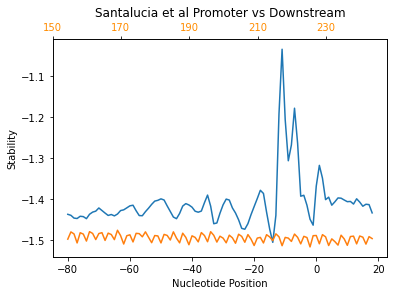

In [20]:
import matplotlib.ticker as ticker

# create the Seaborn line plots
plot = sns.lineplot(x='index', y=0, data=for_line)
plot = sns.lineplot(x='index', y=0, data=downstream_line)

# create a twin Axes object for the new x-axis
ax2 = plot.twiny()

# set the new x-axis tick positions and labels
ax2.set_xticks(downstream_line.index)
ax2.set_xticklabels(downstream_line['downstream position'], color='darkorange')

# set the gap between the tick labels
ax2.xaxis.set_major_locator(ticker.MultipleLocator(20))

# set the x-axis and y-axis labels and title
plot.set(xlabel="Nucleotide Position", ylabel="Stability", title='Santalucia et al Promoter vs Downstream')

# show the plot
plt.show()


### Preparing Training Data

In [21]:
data= pd.concat([promoter,downstream])

In [22]:
data.reset_index(drop=True, inplace=True)

In [23]:
data

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-1.28,-1.44,-1.44,-1.44,-1.44,-1.00,-1.00,-1.28,-1.84,-1.28,...,-1.28,-1.84,-2.24,-1.44,-1.00,-0.58,-1.30,-1.84,-1.30,1
1,-1.28,-1.28,-1.84,-1.45,-1.00,-1.00,-0.88,-1.28,-1.45,-1.00,...,-1.30,-1.30,-1.00,-1.45,-1.45,-1.45,-1.45,-1.00,-0.88,1
2,-0.58,-0.88,-1.00,-1.44,-1.44,-1.44,-1.30,-1.00,-1.00,-1.30,...,-2.24,-1.84,-1.30,-0.88,-1.44,-1.44,-1.00,-1.00,-1.44,1
3,-1.30,-2.27,-2.24,-1.84,-1.30,-1.00,-0.88,-1.00,-1.00,-0.58,...,-1.28,-1.45,-0.88,-1.44,-1.84,-1.30,-1.30,-2.27,-1.84,1
4,-0.58,-1.00,-0.88,-1.00,-1.28,-1.28,-1.00,-0.58,-1.45,-1.45,...,-2.24,-1.30,-1.00,-1.30,-1.30,-1.00,-1.00,-1.00,-1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29333,-0.88,-1.00,-1.44,-2.27,-1.28,-1.44,-1.84,-1.44,-1.00,-1.44,...,-1.30,-1.30,-1.44,-1.00,-1.44,-2.27,-1.84,-1.84,-1.45,0
29334,-1.30,-1.00,-1.30,-1.44,-1.28,-1.45,-1.45,-1.84,-1.45,-1.30,...,-1.00,-0.58,-1.45,-1.28,-1.28,-1.84,-1.28,-0.58,-1.45,0
29335,-1.00,-1.00,-1.00,-1.00,-1.44,-1.84,-2.27,-2.24,-1.44,-0.58,...,-0.58,-1.30,-1.30,-1.45,-1.45,-1.30,-1.44,-1.00,-1.44,0
29336,-2.24,-1.30,-1.00,-0.88,-1.44,-1.84,-1.30,-1.00,-1.30,-1.30,...,-0.88,-1.00,-1.00,-1.00,-1.00,-0.58,-1.45,-1.45,-1.45,0


# Prediction using machine learning

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
from sklearn.model_selection import KFold
from statistics import mean
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,matthews_corrcoef, confusion_matrix

In [26]:

X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109)

inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)





In [27]:
feature_list=list(X_train.columns)

In [28]:
#'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300

In [29]:
X.shape

(29338, 99)

## Model Training

In [32]:
kfold = KFold(n_splits=10, shuffle=True)
clf = RandomForestClassifier(max_depth=20,
                             max_features=None,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             n_estimators=300,
                             n_jobs=-1,
                             random_state=101)

fold_no = 1
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
mcc_list = []
specificity_list = []

for train, test in kfold.split(inputs, targets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=109)

    trainX, testX = inputs[train], inputs[test]
    trainY, testY = targets[train], targets[test]
    clf.fit(trainX, trainY)
    y_pred = clf.predict(testX)

    accuracy_list.append(accuracy_score(testY, y_pred))
    precision_list.append(precision_score(testY, y_pred))
    recall_list.append(recall_score(testY, y_pred))
    f1_score_list.append(f1_score(testY, y_pred))

    # Calculate MCC
    mcc = matthews_corrcoef(testY, y_pred)
    mcc_list.append(mcc)

    # Calculate specificity
    tn, fp, fn, tp = confusion_matrix(testY, y_pred).ravel()
    specificity = tn / (tn + fp)
    specificity_list.append(specificity)

    print("Fold {}: Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        fold_no, accuracy_list[-1], precision_list[-1], recall_list[-1], f1_score_list[-1], mcc_list[-1], specificity_list[-1]))

    fold_no += 1

Fold 1: Accuracy: 0.8537832310838446, Precision: 0.8878923766816144, Recall: 0.8098159509202454, F1 Score: 0.8470588235294116, MCC: 0.7103180541768728, Specificity: 0.8977505112474438
Fold 2: Accuracy: 0.8629856850715747, Precision: 0.8924485125858124, Recall: 0.8176100628930818, F1 Score: 0.8533916849015317, MCC: 0.7277058944244952, Specificity: 0.906187624750499
Fold 3: Accuracy: 0.8524199045671438, Precision: 0.8999241849886277, Recall: 0.7977150537634409, F1 Score: 0.8457427858924118, MCC: 0.7099786917696441, Specificity: 0.9087136929460581
Fold 4: Accuracy: 0.8629856850715747, Precision: 0.8936170212765957, Recall: 0.8178025034770514, F1 Score: 0.8540305010893247, MCC: 0.7279445856975437, Specificity: 0.9064171122994652
Fold 5: Accuracy: 0.8605998636673483, Precision: 0.8873239436619719, Recall: 0.8232462173314993, F1 Score: 0.8540849090260435, MCC: 0.7228574584561728, Specificity: 0.8972972972972973
Fold 6: Accuracy: 0.8585548738922972, Precision: 0.8936484490398818, Recall: 0.81

In [31]:
accuracy_list

[0.854464894342195,
 0.8486707566462167,
 0.8479890933878664,
 0.8513974096796183,
 0.8643490115882754,
 0.854464894342195,
 0.8633265167007498,
 0.8541240627130198,
 0.8632799181725196,
 0.8527105352881009]

In [32]:
precision_list

[0.9052880820836622,
 0.8876058506543495,
 0.8949771689497716,
 0.8843283582089553,
 0.8827734095782702,
 0.8922480620155039,
 0.8991228070175439,
 0.8931466470154753,
 0.9005397070161912,
 0.8851251840942562]

In [33]:
recall_list

[0.7888583218707015,
 0.7946243969676086,
 0.7924528301886793,
 0.8083219645293315,
 0.8407079646017699,
 0.7998610145934677,
 0.8238446081714669,
 0.8107023411371237,
 0.8111111111111111,
 0.8132611637347767]

In [33]:
specificity_list

[0.8977505112474438,
 0.906187624750499,
 0.9087136929460581,
 0.9064171122994652,
 0.8972972972972973,
 0.9008947006194081,
 0.9028256374913852,
 0.9039121482498285,
 0.8980013783597519,
 0.9133105802047782]

In [34]:
f1_score_list 

[0.8430723998529953,
 0.8385454545454545,
 0.8406004288777699,
 0.8446186742694227,
 0.8612273361227336,
 0.8435324294613412,
 0.8598392170569731,
 0.849929873772791,
 0.8534892217756667,
 0.8476727785613541]

In [34]:
mcc_list

[0.7103180541768728,
 0.7277058944244952,
 0.7099786917696441,
 0.7279445856975437,
 0.7228574584561728,
 0.7200167556514853,
 0.6969250562934309,
 0.7120633857500271,
 0.7131912969134573,
 0.7214044496167676]

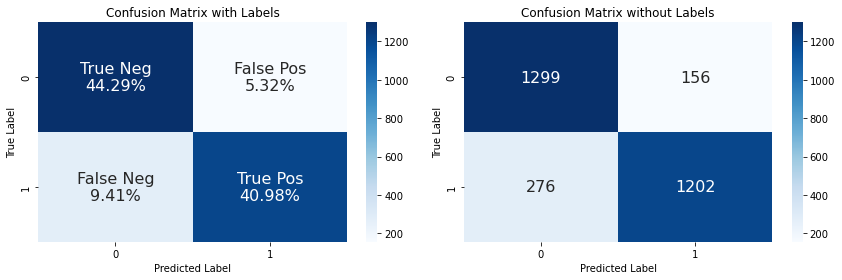

In [35]:
from sklearn.metrics import confusion_matrix
train_cm= confusion_matrix(testY, y_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
train_cm_array = train_cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in train_cm_array / np.sum(train_cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
#sns.set(font_scale=1.4, ax=axes[0])
sns.heatmap(train_cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
#sns.set(font_scale=1.4, ax=axes[1])
sns.heatmap(train_cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


In [36]:
print(mean(accuracy_list))

0.8554777092860757


C:\Users\Subhojit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


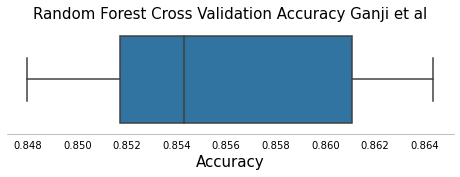

In [37]:
# Create a new figure with a larger size
plt.figure(figsize=(8,2))

# Create the boxplot with a custom title and color
ax = sns.boxplot(np.array(accuracy_list))
#sns.set(style='white')
#sns.set_palette('default')
plt.title('Random Forest Cross Validation Accuracy Ganji et al', fontsize=15)  # Set font size of title
plt.xlabel('Accuracy', fontsize=15)  # Set font size of x-label

# Remove top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Remove left and bottom ticks
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

# Remove left and bottom spines and set their color to gray
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(0.5)

# Display the plot
plt.show()


## Feature Importance

In [38]:
clf.feature_importances_

array([0.00400602, 0.00443902, 0.00375458, 0.00420571, 0.00399176,
       0.00406972, 0.00370864, 0.00393011, 0.00382693, 0.00386507,
       0.00359392, 0.0033711 , 0.0035909 , 0.00351709, 0.00401502,
       0.00353443, 0.00383458, 0.00361609, 0.00398449, 0.00402456,
       0.00374464, 0.00376464, 0.00376958, 0.00405062, 0.00371129,
       0.00385511, 0.00377077, 0.00409004, 0.00366474, 0.00392695,
       0.00408362, 0.00403688, 0.00388455, 0.00362656, 0.00425415,
       0.00379885, 0.00386903, 0.0038161 , 0.00385478, 0.00379804,
       0.00395317, 0.0038003 , 0.00386405, 0.00380995, 0.00437099,
       0.00454366, 0.00421538, 0.00457997, 0.00455928, 0.00437673,
       0.00389815, 0.00432779, 0.00411456, 0.00464695, 0.00522837,
       0.00505991, 0.0049065 , 0.00452523, 0.00551011, 0.00511596,
       0.00528812, 0.00468613, 0.00513541, 0.00514514, 0.00460762,
       0.00511609, 0.00733401, 0.02436009, 0.12706376, 0.22406408,
       0.04586786, 0.01968426, 0.02728609, 0.08984026, 0.02606

In [39]:
clf.feature_importances_.shape

(99,)

In [40]:
X_train.columns

Index([-80, -79, -78, -77, -76, -75, -74, -73, -72, -71, -70, -69, -68, -67,
       -66, -65, -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53,
       -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39,
       -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
       -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11,
       -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,
         4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18],
      dtype='object')

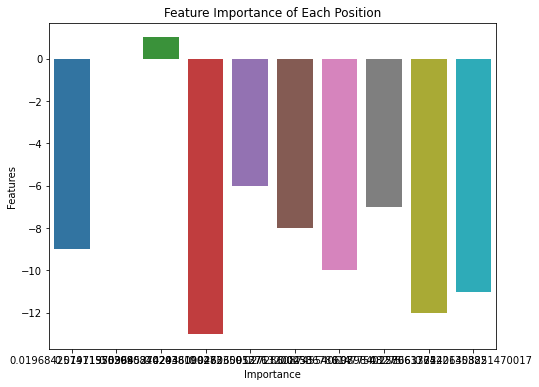

In [41]:
imp_df= pd.DataFrame({
    "Features": X_train.columns,
    "Importance": clf.feature_importances_
})

fi= imp_df.sort_values(by="Importance",ascending=False)

fi2=fi.head(10)
plt.figure(figsize=(8,6))
sns.barplot(data=fi2, x="Importance", y="Features")
plt.title('Feature Importance of Each Position')
plt.show()

In [42]:
feature_importance= pd.DataFrame(clf.feature_importances_)
feature_importance.reset_index(drop=False, inplace=True)
feature_importance['indice']= new_columns
feature_importance

,index,0,indice
0,0,0.004006,-80
1,1,0.004439,-79
2,2,0.003755,-78
3,3,0.004206,-77
4,4,0.003992,-76
...,...,...,...
94,94,0.003545,14
95,95,0.003847,15
96,96,0.003818,16
97,97,0.003651,17


[Text(0.5, 0, 'features'),
 Text(0, 0.5, 'importance'),
 Text(0.5, 1.0, 'feature importance')]

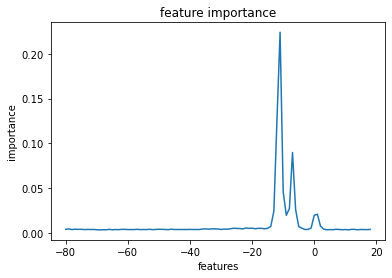

In [43]:
plot= sns.lineplot(x='indice', y=0, data=feature_importance)
plot.set(xlabel ="features", ylabel = "importance", title ='feature importance')

In [35]:
print("Accuracy:",metrics.accuracy_score(testY, y_pred))
print("Precision:",metrics.precision_score(testY, y_pred))
print("Recall:",metrics.recall_score(testY, y_pred))
#print("Specificity:",Spe(testY, y_pred))
print("F1 Score:",metrics.f1_score(testY, y_pred))
print("Mcc:",metrics.f1_score(testY, y_pred))

Accuracy: 0.8585066484827821
Precision: 0.9028309104820199
Recall: 0.8038147138964578
F1 Score: 0.8504504504504504
Mcc: 0.8504504504504504


C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


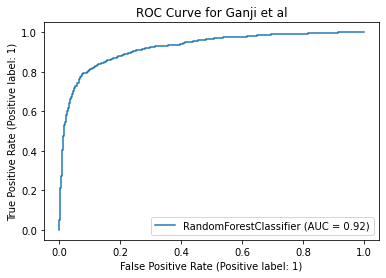

In [45]:
roc_curve= metrics.plot_roc_curve(clf, testX, testY)
roc_curve.ax_.set_title("ROC Curve for Ganji et al")
plt.show()

C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


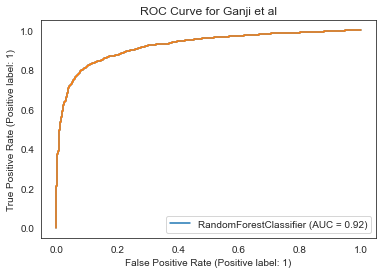

In [71]:
import pandas as pd

# Assuming roc_curve is the object returned by metrics.plot_roc_curve
roc_curve = metrics.plot_roc_curve(clf, testX, testY)

# Extract the data points from roc_curve
fpr = roc_curve.fpr
tpr = roc_curve.tpr

# Create a DataFrame
roc_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})

roc_df.to_csv('d:/ROC Curve data/downstream_santalucia_rf_roc_df.csv', index=False)

# Plot the ROC curve from the DataFrame
plt.plot(roc_df['False Positive Rate'], roc_df['True Positive Rate'])
plt.title("ROC Curve for Ganji et al")
plt.show()


# Using Shapley

In [241]:
!pip install shap

In [242]:
import shap


In [243]:
promoter.shape

(14669, 100)

### X_PCA promotor

In [244]:
import random

# set the random seed to ensure reproducibility
#random.seed(123)

# generate 40 random numbers between 1 to 15000
random_numbers = [random.randint(1, 10000) for _ in range(40)]

# print the random numbers
print(random_numbers)


[3991, 4378, 3910, 8142, 4635, 4780, 6472, 2610, 6965, 6878, 4977, 3854, 7597, 5175, 4294, 1012, 505, 3980, 9778, 9504, 737, 1363, 3189, 1775, 5585, 1321, 4121, 232, 1924, 7402, 6263, 8092, 2495, 3543, 4993, 2939, 4785, 77, 5234, 6919]


In [245]:
X_PCA_promoters = X.loc[[8499, 6345, 8807, 5017, 2395, 4771, 6378, 6038, 2073, 8765, 
                         5534, 8473, 1959, 2733, 9656, 6329, 7081, 1017, 2229, 7451, 338, 5727, 7369, 7392, 4978, 7029, 463, 2599, 8546, 
                         5323, 8468, 8434, 9119, 2251, 5630, 8195, 1717, 8937, 6046, 3685]]

In [246]:
X_PCA_promoters

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,9,10,11,12,13,14,15,16,17,18
8499,-2.17,-2.18,-1.76,-1.44,-2.81,-1.44,-1.46,-2.99,-1.46,-2.18,...,-2.99,-1.42,-2.99,-1.76,-1.42,-1.76,-2.18,-2.81,-1.42,-2.99
6345,-2.81,-1.44,-2.81,-1.44,-1.76,-2.99,-1.42,-2.18,-2.17,-2.18,...,-1.44,-1.95,-1.46,-2.18,-1.46,-2.81,-1.44,-1.76,-2.18,-1.46
8807,-1.44,-1.76,-2.99,-1.42,-2.99,-1.46,-1.44,-1.76,-2.18,-1.46,...,-1.95,-1.44,-1.76,-2.99,-1.42,-2.18,-2.17,-1.95,-1.95,-2.18
5017,-2.81,-1.44,-2.17,-1.44,-2.81,-1.95,-1.95,-1.44,-2.81,-1.52,...,-2.81,-1.76,-1.42,-2.18,-2.81,-1.76,-1.42,-2.81,-1.95,-2.18
2395,-1.44,-1.46,-2.18,-1.46,-2.81,-2.18,-1.44,-1.46,-1.76,-1.76,...,-2.17,-1.95,-1.52,-2.17,-1.95,-2.18,-1.46,-1.95,-1.95,-1.95
4771,-1.46,-2.81,-1.44,-2.18,-2.81,-1.46,-1.95,-1.44,-1.76,-2.99,...,-2.18,-1.76,-1.76,-1.44,-2.81,-1.42,-2.18,-2.17,-1.44,-2.99
6378,-2.18,-1.46,-1.76,-2.99,-1.44,-2.81,-1.44,-1.95,-2.17,-1.52,...,-1.76,-2.99,-1.44,-1.95,-2.81,-1.46,-1.52,-1.95,-2.17,-1.44
6038,-1.46,-1.52,-2.17,-2.18,-1.46,-1.52,-2.81,-1.46,-1.52,-2.17,...,-1.52,-2.17,-1.95,-2.18,-1.46,-2.18,-1.42,-2.18,-2.17,-1.52
2073,-1.42,-2.81,-1.52,-1.46,-2.99,-1.44,-1.46,-2.99,-1.44,-2.81,...,-2.17,-2.18,-1.44,-1.95,-2.17,-1.95,-1.95,-1.52,-2.17,-2.18
8765,-1.44,-1.95,-2.17,-1.52,-2.81,-1.76,-1.44,-2.17,-2.18,-1.76,...,-2.17,-1.44,-2.99,-1.76,-1.46,-1.95,-2.18,-1.46,-1.52,-2.17


In [247]:
explainer = shap.KernelExplainer(clf.predict, X_PCA_promoters)
shap_values = explainer.shap_values(X_PCA_promoters)

  0%|          | 0/40 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

In [248]:
shap_file = pd.DataFrame(shap_values)
shap_train_csv_file = 'shap_train.csv'

with open(shap_train_csv_file, mode='w') as f:
    shap_file.to_csv(f)

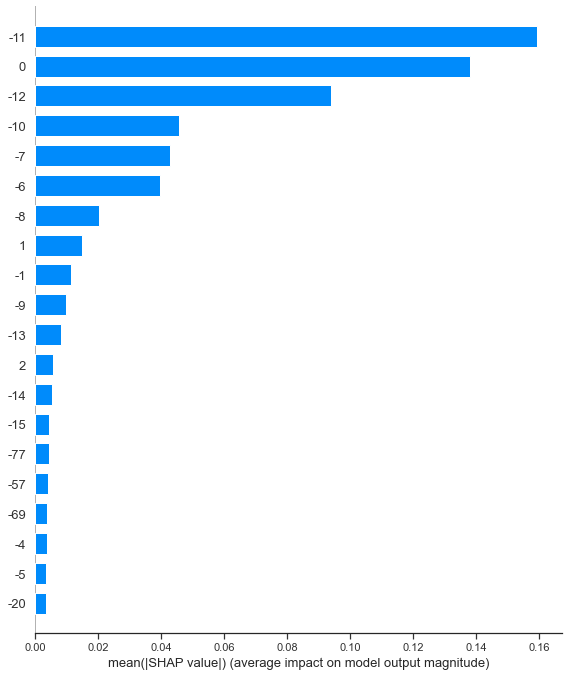

In [249]:
shap.summary_plot(shap_values,X_PCA_promoters, plot_type="bar", feature_names = X_PCA_promoters.columns)

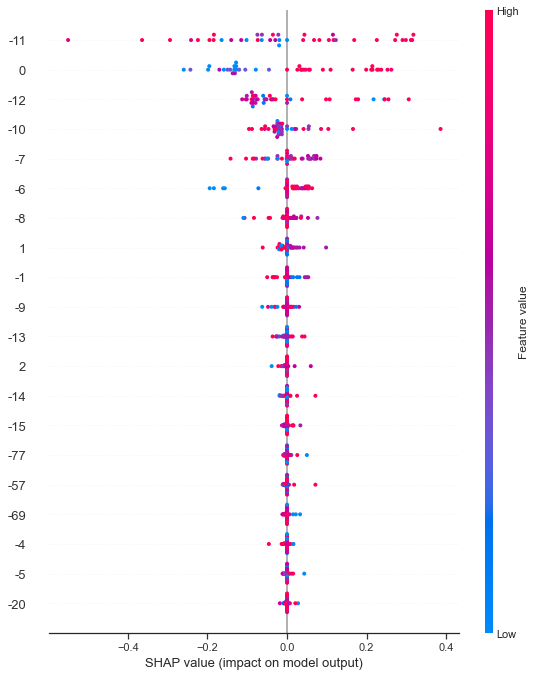

In [250]:
shap.summary_plot(shap_values, X_PCA_promoters, feature_names = X_PCA_promoters.columns)

AttributeError: 'int' object has no attribute 'split'

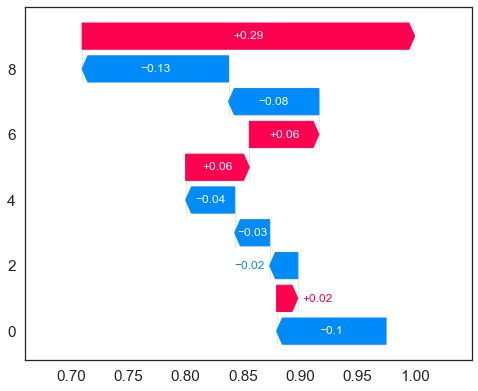

In [253]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[4], feature_names = X_PCA_promoters.columns)

In [254]:
shap.initjs()
shap.plots.force(explainer.expected_value, shap_values, feature_names = X_PCA_promoters.columns)

In [255]:
shap.initjs()
shap.plots.force(explainer.expected_value,shap_values[0], feature_names = X_PCA_promoters.columns)

# Test Organism Predictions

## Test Data

In [36]:
# Load the Test organisms dataset into a DataFrame
klebsiella = pd.read_csv(r"D:\ten organism\santalucia\test organism\stability_Sequences_80-20_sequences Klebsiella pneumoniae_output.csv")
salmonella= pd.read_csv(r"D:\ten organism\santalucia\test organism\stability_Sequences_80-20_sequences Salmonella enterica_output.csv")
klebsiella_downstream= pd.read_csv(r"D:\downstream control\santalucia\result\test organism\stability_Klebsiella pneumoniae_output.csv")
salmonella_downstream= pd.read_csv(r"D:\downstream control\santalucia\result\test organism\stability_Salmonella enterica_output.csv")

# Remove any irrelevant columns
test_organism = pd.concat([klebsiella,salmonella])
test_organism.columns=new_columns
test_organism.reset_index(drop=True, inplace=True)

test_organism_downstream= pd.concat([klebsiella_downstream,salmonella_downstream])
test_organism_downstream.columns=new_columns
test_organism_downstream.reset_index(drop=True, inplace=True)

test_without_labels= pd.concat([test_organism, test_organism_downstream])


In [37]:
test_line= pd.DataFrame(test_organism.mean())
test_line.reset_index(drop=False, inplace=True)
downstream_test_line=pd.DataFrame(test_organism_downstream.mean())
downstream_test_line.reset_index(drop= False, inplace=True)



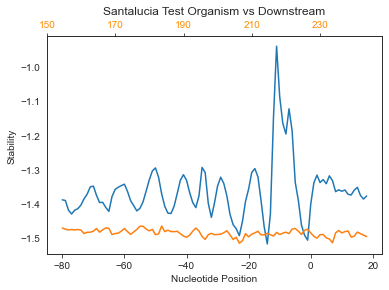

In [38]:
import matplotlib.ticker as ticker

sns.set_style('white')
# create the Seaborn line plots
plot = sns.lineplot(x='index', y=0, data=test_line)
plot = sns.lineplot(x='index', y=0, data=downstream_test_line)

# create a twin Axes object for the new x-axis
ax2 = plot.twiny()

# set the new x-axis tick positions and labels
ax2.set_xticks(downstream_line.index)
ax2.set_xticklabels(downstream_line['downstream position'], color='darkorange')

# set the gap between the tick labels
ax2.xaxis.set_major_locator(ticker.MultipleLocator(20))

# set the x-axis and y-axis labels and title
plot.set(xlabel="Nucleotide Position", ylabel="Stability", title='Santalucia Test Organism vs Downstream')

# show the plot
plt.show()


## Test Labels

In [39]:
test_organism_lables= np.ones(test_organism.shape[0], dtype=int)
test_downstream_labels= np.zeros(test_organism_downstream.shape[0], dtype=int)

test_labels = np.concatenate((test_organism_lables, test_downstream_labels))

In [40]:
test_without_labels.shape

(4620, 99)

## Test Prediction in One Go

In [41]:
# Create an array of ones with the same number of rows as the new dataset
#true_labels = np.ones(test_organism.shape[0], dtype=int)

# Make predictions on the new data
test_organism_pred = clf.predict(test_without_labels)

# Calculate the accuracy of the model on the new data
accuracy = metrics.accuracy_score(test_labels, test_organism_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8939393939393939


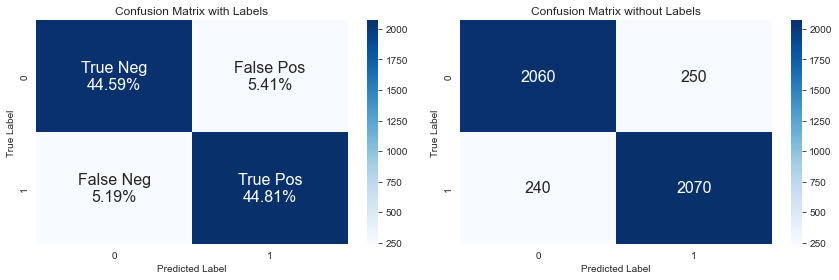

In [42]:
# Compute confusion matrix
cm = confusion_matrix(test_labels, test_organism_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
cm_array = cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in cm_array / np.sum(cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
#sns.set(font_scale=1.4, ax=axes[0])
sns.heatmap(cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
#sns.set(font_scale=1.4, ax=axes[1])
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


## Test Prediction in 10 splits

In [45]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score, confusion_matrix, matthews_corrcoef

In [44]:
# Convert DataFrame to numpy array
if isinstance(test_without_labels, pd.DataFrame):
    test_without_labels = test_without_labels.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

test_accuracy = []
test_precision = []
test_recall = []
test_f1_score = []
test_mcc = []
test_specificity = []
all_cms = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(test_without_labels, test_labels)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = test_without_labels[test_index]
    y_test = test_labels[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    test_accuracy.append(accuracy)
    test_precision.append(precision)
    test_recall.append(recall)
    test_f1_score.append(f1)
    
    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    all_cms.append(cm)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    test_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    test_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        test_accuracy[-1], test_precision[-1], test_recall[-1], test_f1_score[-1], test_mcc[-1], test_specificity[-1]))

Fold 1/10
 Accuracy: 0.8939393939393939, Precision: 0.8922413793103449, Recall: 0.8961038961038961, F1 Score: 0.8941684665226782, MCC: 0.7878861705164995, Specificity: 0.8917748917748918
Fold 2/10
 Accuracy: 0.8701298701298701, Precision: 0.8577405857740585, Recall: 0.8874458874458875, F1 Score: 0.8723404255319149, MCC: 0.7407040655429028, Specificity: 0.8528138528138528
Fold 3/10
 Accuracy: 0.8636363636363636, Precision: 0.8589743589743589, Recall: 0.8701298701298701, F1 Score: 0.8645161290322582, MCC: 0.7273340668525836, Specificity: 0.8571428571428571
Fold 4/10
 Accuracy: 0.8831168831168831, Precision: 0.8641975308641975, Recall: 0.9090909090909091, F1 Score: 0.8860759493670887, MCC: 0.7672697427301892, Specificity: 0.8571428571428571
Fold 5/10
 Accuracy: 0.9177489177489178, Precision: 0.9141630901287554, Recall: 0.922077922077922, F1 Score: 0.9181034482758621, MCC: 0.835529152182711, Specificity: 0.9134199134199135
Fold 6/10
 Accuracy: 0.9047619047619048, Precision: 0.9155555555555

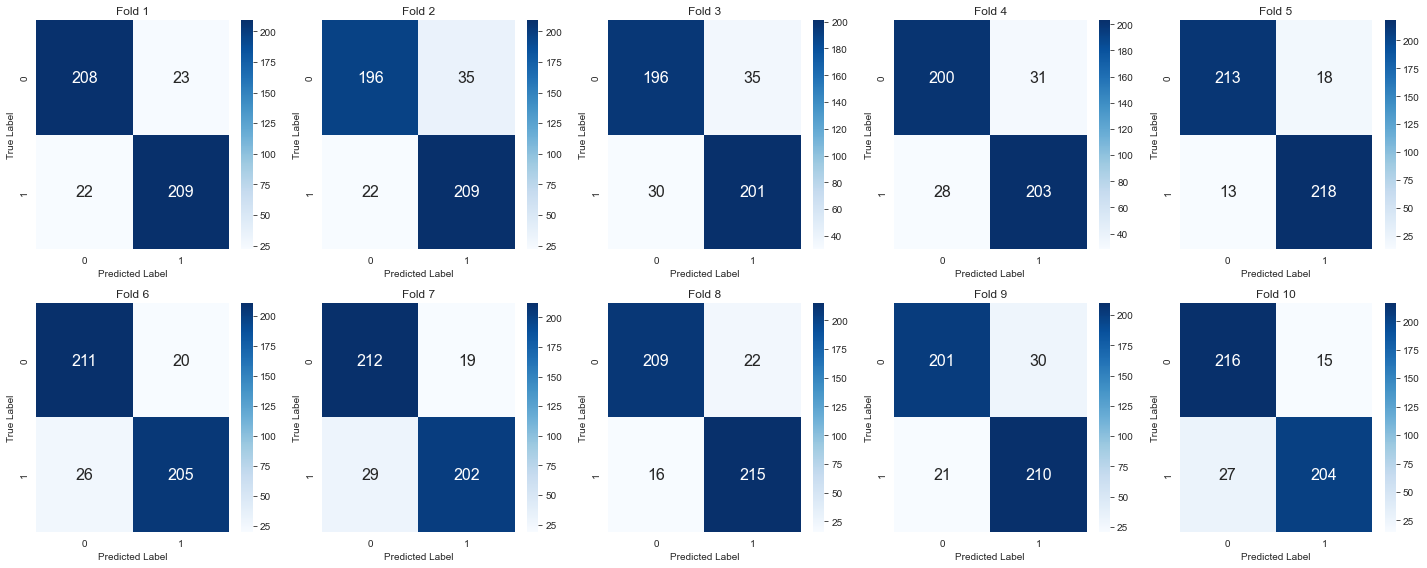

In [54]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i, ax in enumerate(axs.flatten()):
    if i < len(all_cms):
        cm = all_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


In [69]:
test_accuracy

[0.8939393939393939,
 0.8701298701298701,
 0.8636363636363636,
 0.8831168831168831,
 0.9177489177489178,
 0.9047619047619048,
 0.8939393939393939,
 0.9112554112554112,
 0.9025974025974026,
 0.8982683982683982]

In [70]:
test_precision

[0.8922413793103449,
 0.8577405857740585,
 0.8589743589743589,
 0.8641975308641975,
 0.9141630901287554,
 0.9155555555555556,
 0.9099099099099099,
 0.905982905982906,
 0.8907563025210085,
 0.9181818181818182]

- Precision equal to 1.0 means that all the positive predictions made by the classifier are correct. 
- In other words, the classifier didn't make any false positive predictions. 

In [57]:
test_recall

[0.9047619047619048,
 0.9047619047619048,
 0.8701298701298701,
 0.8787878787878788,
 0.9437229437229437,
 0.8874458874458875,
 0.8744588744588745,
 0.9307359307359307,
 0.9090909090909091,
 0.8831168831168831]

In [46]:
test_specificity

[0.8917748917748918,
 0.8528138528138528,
 0.8571428571428571,
 0.8571428571428571,
 0.9134199134199135,
 0.9177489177489178,
 0.9134199134199135,
 0.9047619047619048,
 0.8874458874458875,
 0.922077922077922]

In [58]:
test_f1_score

[0.9028077753779697,
 0.8800000000000001,
 0.860813704496788,
 0.8731182795698924,
 0.9336188436830835,
 0.899122807017544,
 0.8938053097345133,
 0.9188034188034189,
 0.8917197452229298,
 0.9066666666666665]

In [47]:
test_mcc

[0.7878861705164995,
 0.7407040655429028,
 0.7273340668525836,
 0.7672697427301892,
 0.835529152182711,
 0.8097970204021665,
 0.7884774547802218,
 0.8225801946547077,
 0.8055647545849631,
 0.7974414382781317]

## Antisense Promoters with Downstream

###### Bacteria Names
- Chlamydia pneumoniae
- Corynebacterium glutamicum
- Helicobactor pylori
- Mycobacterium tuberculosis
- Nostoc sp
- Pseudomonas aeruginosa
- Salmonella enterica
- Streptomyces coelicolor
- Synechocystis sp

In [49]:
antisense= pd.read_csv(r"D:\Other promoters\Downstream sequences\Antisense\Antisense promoter vs downstream\Antisense santalucia promoter vs downstream.csv")
antisense

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-0.58,-1.30,-1.84,-1.30,-0.88,-1.00,-1.28,-1.28,-1.00,-1.00,...,-1.84,-1.45,-1.00,-1.00,-1.00,-1.30,-1.30,-1.00,-1.30,1
1,-1.30,-1.00,-1.30,-2.27,-2.24,-1.30,-0.88,-0.58,-1.00,-1.30,...,-1.00,-1.30,-2.27,-1.45,-0.88,-1.28,-1.84,-1.45,-1.00,1
2,-1.00,-1.28,-1.45,-0.88,-1.44,-1.30,-0.88,-0.58,-0.88,-0.58,...,-1.30,-2.27,-1.28,-1.28,-2.24,-1.44,-0.58,-1.00,-1.00,1
3,-1.28,-1.28,-0.58,-1.30,-1.30,-1.00,-1.30,-2.27,-1.28,-1.44,...,-1.44,-1.84,-1.30,-1.30,-1.30,-1.00,-1.00,-0.88,-1.44,1
4,-1.30,-1.84,-1.44,-0.58,-1.00,-1.00,-0.88,-0.58,-1.45,-1.84,...,-1.45,-1.30,-1.84,-2.27,-1.84,-1.84,-1.28,-1.28,-1.28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12163,-2.24,-1.44,-1.00,-1.00,-1.28,-1.84,-1.84,-1.84,-1.28,-1.00,...,-1.00,-1.28,-1.45,-0.88,-1.28,-2.24,-1.44,-1.28,-1.84,0
12164,-1.00,-1.28,-1.28,-1.00,-1.28,-2.24,-1.84,-1.44,-1.44,-2.27,...,-1.45,-1.84,-2.24,-1.84,-1.30,-1.30,-2.27,-2.24,-1.30,0
12165,-1.28,-1.44,-1.30,-0.88,-1.44,-1.84,-1.84,-1.84,-1.30,-1.30,...,-1.45,-1.28,-0.58,-1.00,-1.45,-1.45,-1.30,-2.27,-1.84,0
12166,-1.00,-1.30,-1.30,-0.88,-1.00,-1.44,-2.27,-2.24,-1.84,-1.84,...,-1.84,-1.84,-1.30,-1.45,-1.28,-1.00,-1.00,-0.58,-1.30,0


In [50]:
antisense_promoter= antisense.drop(columns=['label'])
antisense_label= antisense['label']

In [51]:
# Convert DataFrame to numpy array
if isinstance(antisense_promoter, pd.DataFrame):
    antisense_promoter = antisense_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

antisense_accuracy = []
antisense_precision=[]
antisense_recall=[]
antisense_f1_score=[]
antisense_cms = []
antisense_mcc = []
antisense_specificity = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(antisense_promoter, antisense_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = antisense_promoter[test_index]
    y_test = antisense_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    antisense_accuracy.append(accuracy)
    antisense_precision.append(precision)
    antisense_recall.append(recall)
    antisense_f1_score.append(f1)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    antisense_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    antisense_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    antisense_accuracy[-1], antisense_precision[-1], antisense_recall[-1], antisense_f1_score[-1],
    antisense_mcc[-1], antisense_specificity[-1]))

    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    antisense_cms.append(cm)


Fold 1/10
 Accuracy: 0.8142974527526705, Precision: 0.836555360281195, Recall: 0.7816091954022989, F1 Score: 0.8081494057724956, MCC: 0.6299771541902315, Specificity: 0.922077922077922
Fold 2/10
 Accuracy: 0.8142974527526705, Precision: 0.8134206219312602, Recall: 0.8160919540229885, F1 Score: 0.8147540983606557, MCC: 0.6285970470323996, Specificity: 0.8470394736842105
Fold 3/10
 Accuracy: 0.8307313064913723, Precision: 0.846815834767642, Recall: 0.8078817733990148, F1 Score: 0.8268907563025211, MCC: 0.662176536775439, Specificity: 0.8125
Fold 4/10
 Accuracy: 0.828266228430567, Precision: 0.826797385620915, Recall: 0.8308702791461412, F1 Score: 0.8288288288288289, MCC: 0.6565388127236008, Specificity: 0.8536184210526315
Fold 5/10
 Accuracy: 0.8258011503697618, Precision: 0.83, Recall: 0.819078947368421, F1 Score: 0.8245033112582781, MCC: 0.6516546233768427, Specificity: 0.8256578947368421
Fold 6/10
 Accuracy: 0.8216926869350862, Precision: 0.8148148148148148, Recall: 0.8322368421052632

In [52]:
antisense_accuracy

[0.8142974527526705,
 0.8142974527526705,
 0.8307313064913723,
 0.828266228430567,
 0.8258011503697618,
 0.8216926869350862,
 0.8331963845521775,
 0.828266228430567,
 0.8092105263157895,
 0.8240131578947368]

In [53]:
antisense_precision

[0.836555360281195,
 0.8134206219312602,
 0.846815834767642,
 0.826797385620915,
 0.83,
 0.8148148148148148,
 0.8426395939086294,
 0.8330550918196995,
 0.8186440677966101,
 0.8350340136054422]

In [54]:
antisense_recall

[0.7816091954022989,
 0.8160919540229885,
 0.8078817733990148,
 0.8308702791461412,
 0.819078947368421,
 0.8322368421052632,
 0.819078947368421,
 0.8207236842105263,
 0.7944078947368421,
 0.8075657894736842]

In [56]:
antisense_specificity

[0.922077922077922,
 0.8470394736842105,
 0.8125,
 0.8536184210526315,
 0.8256578947368421,
 0.8325123152709359,
 0.8111658456486043,
 0.8472906403940886,
 0.8357963875205254,
 0.8240131578947368]

In [55]:
antisense_f1_score

[0.8081494057724956,
 0.8147540983606557,
 0.8268907563025211,
 0.8288288288288289,
 0.8245033112582781,
 0.8234336859235151,
 0.8306922435362804,
 0.8268434134217068,
 0.8063439065108514,
 0.8210702341137123]

In [57]:
antisense_mcc

[0.6299771541902315,
 0.6285970470323996,
 0.662176536775439,
 0.6565388127236008,
 0.6516546233768427,
 0.6435382672008608,
 0.6666451089561136,
 0.6565998746598034,
 0.6186922451608118,
 0.6483772034576144]

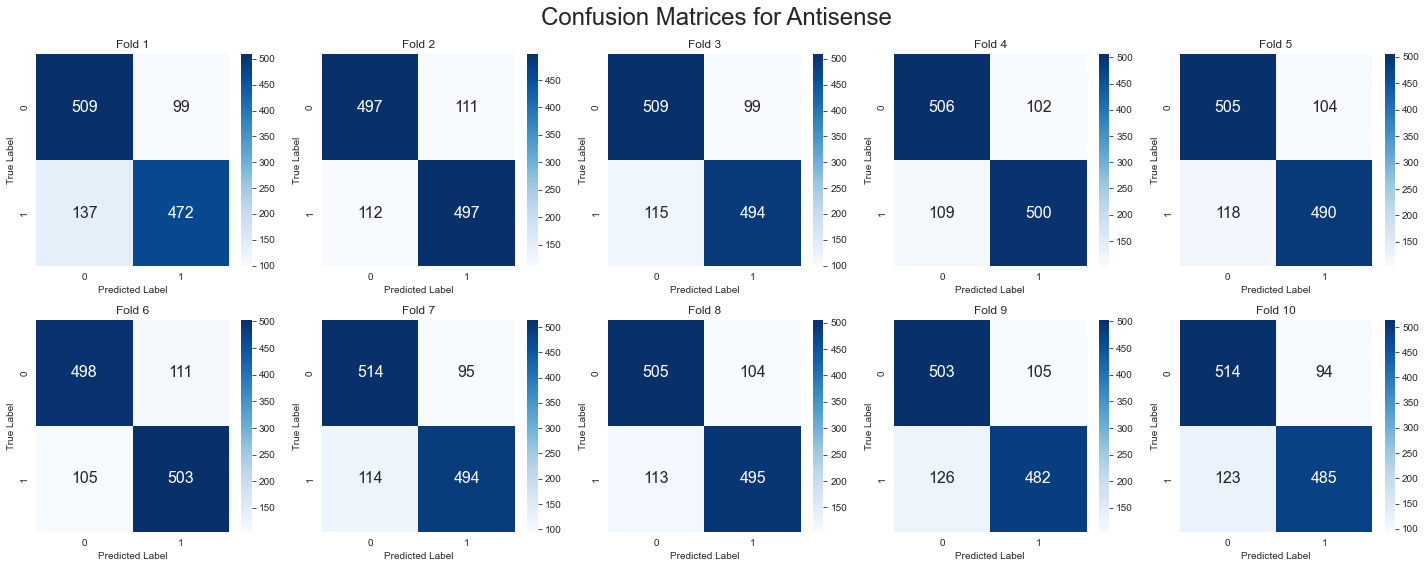

In [62]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Antisense", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(antisense_cms):
        cm = antisense_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


## Internal Promoter with downstream

#### Bacteria Names
- Chlamydia pneumoniae
- Corynebacterium glutamicum
- E.coli
- Helicobactor pylori
- Klebsiella pneumoniae
- Mycobacterium tuberculosis
- Nostoc sp
- Pseudomonas aeruginosa
- Streptomyces coelicolor

In [58]:
internal= pd.read_csv(r"D:\Other promoters\Downstream sequences\Induced\Induced promoter vs downstream\Induced santalucia promoter vs downstream.csv")
internal

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-1.28,-1.28,-2.24,-1.44,-0.58,-1.45,-2.24,-1.84,-1.84,-1.30,...,-1.00,-1.30,-1.30,-1.00,-1.00,-1.00,-0.88,-1.28,-1.45,1
1,-0.88,-1.28,-1.45,-1.00,-1.00,-0.88,-1.00,-1.00,-0.58,-1.45,...,-1.45,-1.30,-2.27,-1.28,-1.00,-0.58,-0.88,-1.44,-2.27,1
2,-1.84,-1.84,-2.27,-1.84,-1.45,-0.88,-1.44,-2.27,-1.45,-1.30,...,-1.30,-2.27,-1.45,-1.00,-0.88,-1.00,-1.44,-2.27,-1.28,1
3,-1.45,-1.45,-1.00,-1.45,-1.28,-1.44,-1.30,-0.88,-1.00,-0.58,...,-1.00,-1.00,-1.45,-2.24,-1.30,-1.00,-1.00,-0.88,-1.28,1
4,-1.28,-1.28,-1.28,-1.00,-1.00,-0.58,-1.00,-1.00,-0.88,-1.28,...,-1.45,-1.45,-1.00,-1.30,-1.30,-1.00,-1.00,-1.00,-0.88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12125,-1.84,-2.27,-1.84,-1.84,-1.45,-1.45,-2.24,-1.84,-2.27,-2.24,...,-1.45,-1.00,-1.45,-1.28,-1.28,-1.84,-1.84,-2.24,-1.84,0
12126,-1.84,-2.24,-1.30,-1.45,-2.24,-2.27,-1.45,-1.00,-1.30,-2.27,...,-1.84,-2.27,-2.24,-1.30,-1.00,-1.45,-1.84,-2.24,-2.27,0
12127,-1.00,-1.30,-1.30,-1.00,-1.30,-1.30,-1.45,-1.84,-2.24,-1.30,...,-1.45,-1.45,-2.24,-2.27,-1.84,-1.45,-1.45,-1.84,-1.45,0
12128,-2.27,-1.84,-2.24,-1.30,-1.00,-1.30,-1.30,-1.45,-1.84,-1.45,...,-2.27,-2.24,-1.84,-1.30,-0.88,-1.28,-2.24,-1.84,-2.27,0


In [59]:
internal_promoter= internal.drop(columns=['label'])
internal_label= internal['label']

In [60]:
# Convert DataFrame to numpy array
if isinstance(internal_promoter, pd.DataFrame):
    internal_promoter = internal_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

internal_accuracy = []
internal_precision=[]
internal_recall=[]
internal_f1_score=[]
internal_cms = []
internal_mcc = []
internal_specificity = []


# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(internal_promoter, internal_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = internal_promoter[test_index]
    y_test = internal_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    internal_accuracy.append(accuracy)
    internal_precision.append(precision)
    internal_recall.append(recall)
    internal_f1_score.append(f1)
    internal_mcc.append(mcc)
    internal_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    internal_accuracy[-1], internal_precision[-1], internal_recall[-1], internal_f1_score[-1],
    internal_mcc[-1], internal_specificity[-1]))
    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    internal_cms.append(cm)


Fold 1/10
 Accuracy: 0.8037922506183017, Precision: 0.8197573656845754, Recall: 0.7792421746293245, F1 Score: 0.7989864864864864, MCC: 0.6083448509621753, Specificity: 0.8404605263157895
Fold 2/10
 Accuracy: 0.8062654575432812, Precision: 0.8357400722021661, Recall: 0.7627677100494233, F1 Score: 0.7975882859603789, MCC: 0.6149105863818544, Specificity: 0.8283828382838284
Fold 3/10
 Accuracy: 0.8128606760098929, Precision: 0.8405017921146953, Recall: 0.7726523887973641, F1 Score: 0.8051502145922748, MCC: 0.6277980067817018, Specificity: 0.8498349834983498
Fold 4/10
 Accuracy: 0.8186314921681781, Precision: 0.8511796733212341, Recall: 0.7726523887973641, F1 Score: 0.8100172711571676, MCC: 0.6400240018000833, Specificity: 0.8531353135313532
Fold 5/10
 Accuracy: 0.7906018136850783, Precision: 0.815742397137746, Recall: 0.7512355848434926, F1 Score: 0.7821612349914236, MCC: 0.583059309216448, Specificity: 0.8646864686468647
Fold 6/10
 Accuracy: 0.8161582852431987, Precision: 0.8342059336823

In [61]:
internal_accuracy

[0.8037922506183017,
 0.8062654575432812,
 0.8128606760098929,
 0.8186314921681781,
 0.7906018136850783,
 0.8161582852431987,
 0.8367683429513603,
 0.8112118713932399,
 0.8334707337180544,
 0.8425391591096455]

In [62]:
internal_precision

[0.8197573656845754,
 0.8357400722021661,
 0.8405017921146953,
 0.8511796733212341,
 0.815742397137746,
 0.8342059336823735,
 0.8578947368421053,
 0.8384201077199281,
 0.8740740740740741,
 0.8849721706864564]

In [63]:
internal_recall

[0.7792421746293245,
 0.7627677100494233,
 0.7726523887973641,
 0.7726523887973641,
 0.7512355848434926,
 0.7887788778877888,
 0.806930693069307,
 0.7706270627062707,
 0.7788778877887789,
 0.7871287128712872]

In [64]:
internal_specificity

[0.8404605263157895,
 0.8283828382838284,
 0.8498349834983498,
 0.8531353135313532,
 0.8646864686468647,
 0.83003300330033,
 0.8434925864909391,
 0.8665568369028006,
 0.8517298187808896,
 0.8879736408566722]

In [66]:
internal_f1_score

[0.7989864864864864,
 0.7975882859603789,
 0.8051502145922748,
 0.8100172711571676,
 0.7821612349914236,
 0.8108566581849025,
 0.8316326530612245,
 0.8030954428202923,
 0.8237347294938918,
 0.8331877729257643]

In [67]:
internal_mcc

[0.6083448509621753,
 0.6149105863818544,
 0.6277980067817018,
 0.6400240018000833,
 0.583059309216448,
 0.6332379603332642,
 0.6747102412252232,
 0.6244398867817684,
 0.6708962998609133,
 0.6892688892521049]

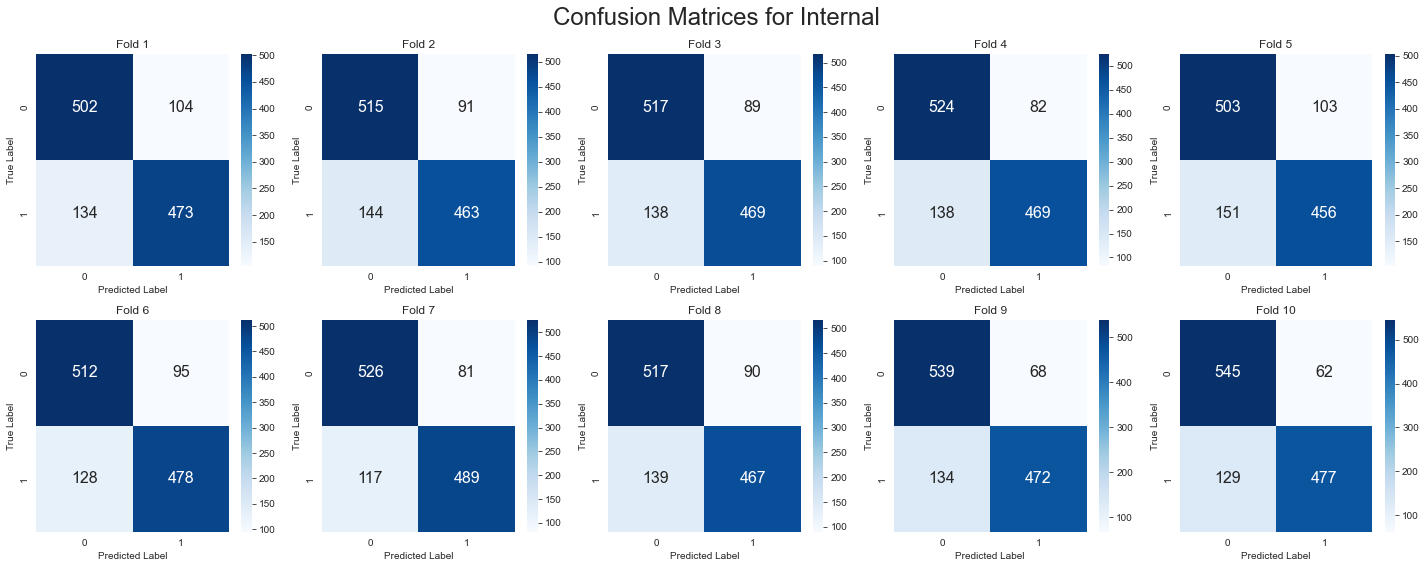

In [68]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Internal", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(internal_cms):
        cm = internal_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()
